# Зачетная работа по предмету “Системы компьютерной математики”.
#### Тема:  Ряд Тейлора для синуса

#### Выполнил: Кочетов Николай Алексеевич

#### Преподаватель: Золотых Николай Юрьевич

## Задание

  “Ряд Тейлора для синуса”
Напишите функцию mysin(x, n), вычисляющую сумму первых и членов ряда Тейлора для функции sin x

Функция должна выполнять O(n) операций и не содержать питоновских циклов. Постройте графики получающихся функций для разных п. Вариант этой функции mysin(x) должен вычислять столько слагаемых, пока результат перестанет изменяться (он может содержать циклы). Протестируйте функцию на значениях x = pi/2, 11pi/2, 21pi/2, 31pi/2, 

 Постройте графики зависимости точности от числа слагаемых п. Какова точность результатов, полученных для таких х?
Сколько членов потребовалось? Каков максимальный по абсолютному значению член? Попробуйте объяснить, почему результаты неудовлетворительные.


## Рассуждения (исследование темы)

   1)Членам ряда Тейлора функции f(x) требуются производные последовательно более высоких порядков f^(n)(x) — для определения коэффициентов полинома. Следовательно, ряд Тейлора может быть определен для f(x), только если она бесконечно дифференцируема.
   Так как в задании нам указано, что наша f(x) = sinx, то проблема исчезает, мы можем бесконечно брать производную от нашей функции:  sin(x)'= cos(x)  |  cos(x)'= -sin(x)


   2)В задании сказано, что мы не должны использовать встроенные циклы для подсчета с ограничением по n. Тогда как же мы можем посчитать? Для этого надо использовать рекурсию. Таким образом, мы будем вызывать нашу функцию для подсчета до тех пор, пока нужное цель не будет достигнута.
   
подробнее про рекурсию: https://pythontutor.ru/lessons/functions/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
math.pi

3.141592653589793

In [2]:
PI = math.pi

## Фунция для подсчета факториала

In [3]:
def factorial(num):
    if num == 0:
        return 1
    else:
        return num * factorial(num - 1)

## Функция для подсчета ряда тэйлора с N элементами

In [4]:
def mysin(angle, n):
    res = ((-1)  ** ( n + 1)) * (angle  ** (2 * n - 1)) / factorial(2 * n - 1)
    if n == 1:           # возвращение конечного результата
        return res
    else:                # возвращение нового значения для последующего "цикла"
        return res + mysin(angle, n - 1)

## Фунция для выбора угла

### Для упрощения кода в данном исследовании, дальше не будет писаться "angle = ..."
### Будет использоваться функция chooseAngle(choose)
    choose = 1 для угла:    PI / 2

    choose = 2 для угла:    11PI / 2

    choose = 3 для угла:    21PI / 2

    choose = 4 для угла:    31PI / 2

In [5]:
def chooseAngle(choose):
    if choose == 1: return PI / 2
    if choose == 2: return 11 * PI / 2
    if choose == 3: return 21 * PI / 2
    if choose == 4: return 31 * PI / 2
    if choose == 5:
        angle = float(input("Введите угол в радианах: "))
        return angle
    else:
        angle = float(input("Введите угол в градусах: "))
        return angle * PI / 180

## "Калькулятор"

In [6]:
print("Введите с каким значением посчитать X")
print("1) pi/2")
print("2) 11pi/2")
print("3) 21pi/2")
print("4) 31pi/2")
print("5) ввести значение в радианах")
print("else - ввести значение в градусах")
userChoose = int(input("Введите свой выбор: "))
n = int(input("Введите количество элементов для вычисления: "))

print("\nРезультат: " + str(mysin(chooseAngle(userChoose), n)))

Введите с каким значением посчитать X
1) pi/2
2) 11pi/2
3) 21pi/2
4) 31pi/2
5) ввести значение в радианах
else - ввести значение в градусах
Введите свой выбор: 1
Введите количество элементов для вычисления: 5

Результат: 1.0000035425842861


# Функция для дальнейшего построения графиков

In [7]:
def DrawGraph(n1, n2, angle, graphName):
    mass = []
    TaylorMassN = []
    for i in range(n1, n2 + 1):
        mass.append(i)
        TaylorMassN.append(mysin(angle, i))
        
    plt.figure(figsize=(11, 5.5))
    plt.plot(mass, TaylorMassN)
    plt.scatter(mass, TaylorMassN)
    plt.grid()
    plt.title(graphName)

## График для угла pi/2 c N равным от 1 до 15

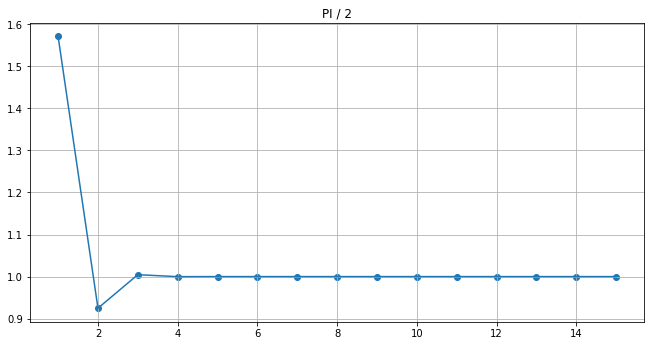

In [8]:
DrawGraph(1, 15, chooseAngle(1), "PI / 2")

### Точное значение ряда тэйлора

In [9]:
print(math.sin(PI / 2))

1.0


##### Промежуточный вывод
На графике видно, что самое большое отклонение при N = 1, значение в этой точке равняется 1.5707963267948966, а точное значение ряда, при данном угле, равно 1.
##### но
Уже на 5 элементе значение становится достаточно точным(при N = 5, значение ряда = 1.0000035425842861)

## График для угла 11pi/2 c N равным от 1 до 25

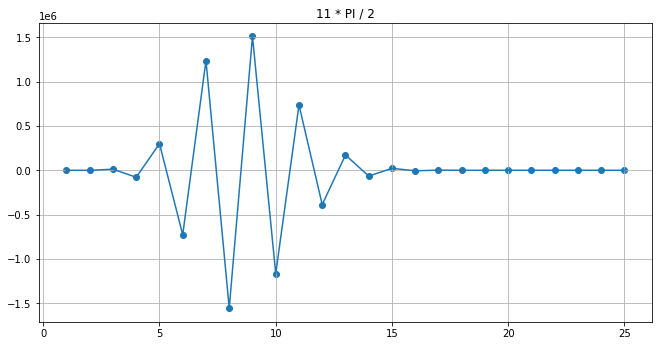

In [10]:
DrawGraph(1, 25, chooseAngle(2), "11 * PI / 2")

### Точное значение ряда тэйлора

In [11]:
print(math.sin(11 * PI / 2))

-1.0


##### Промежуточный вывод
На графике видно, что самое большое отклонение при N = 8, значение в этой точке равняется -1556387.8895733021, а точное значение ряда, при данном угле, равно -1.
##### но
Уже на 26 элементе значение становится достаточно точным(при N = 26, значение ряда = -1.0000822973309162)

    (на графике числа по оси y поделены на 1 000 000)

## График для угла 21pi/2 c N равным от 1 до 50

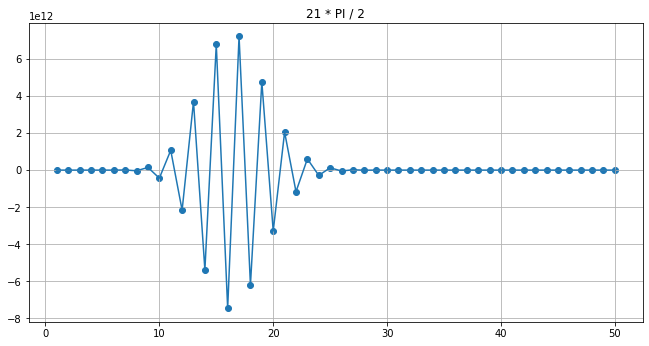

In [12]:
DrawGraph(1, 50, chooseAngle(3), "21 * PI / 2")

### Точное значение ряда тэйлора

In [13]:
print(math.sin(21 * PI / 2))

1.0


##### Промежуточный вывод
На графике видно, что самое большое отклонение при N = 16, значение в этой точке равняется -7455907444838.747, а точное значение ряда, при данном угле, равно 1.
##### но
На 50 элементе значение становится хотя бы приблизительно точным(при N = 50, значение ряда = 1.0046246882754724)

    (на графике числа по оси y поделены на 1 000 000 000 000)

## График для угла 31pi/2 c N равным от 1 до 85

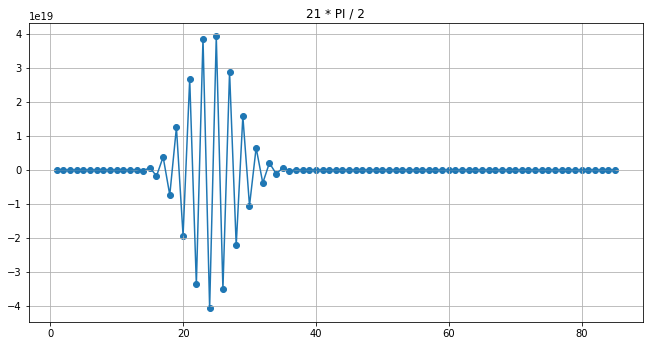

In [14]:
DrawGraph(1, 85, chooseAngle(4), "21 * PI / 2")

### Точное значение ряда тэйлора

In [15]:
print(math.sin(31 * PI / 2))

-1.0


##### Промежуточный вывод
На графике видно, что самое большое отклонение при N = 24, значение в этой точке равняется -40620503147940640000, а приблизительное значение ряда, при данном угле, равно 17863.02585515233.(возможности Python не дают расчитать более точное число, так как факториал становится слишком большим, но точное значение = -1)
##### но
На 85 элементе значение становится хотя бы приблизительно точным(при N = 85, значение ряда = 17863.02585515233)

    (на графике числа по оси y поделены на 10 000 000 000 000 000 000)

## ВЫВОД
##### Исходя из полученных результатов можно понять следующее:
## 1)
#### От увеличения x разброс ряда будет все больше:

    при  x = PI / 2          на 1 элементе     максимальное значение = 1.5707963267948966
    при  x = 11 * PI / 2     на 8 элементе     максимальное значение = -1556387.8895733021
    при  x = 21 * PI / 2     на 16 элементе    максимальное значение = -7455907444838.747
    при  x = 31 * PI / 2     на 24 элементе    максимальное значение = -40620503147940640000
    
    Так же можно заметить, что N, при котором ряд приобретает максимальное значение так же постепенно, как и x, которые мы испытывали
    (график ниже)

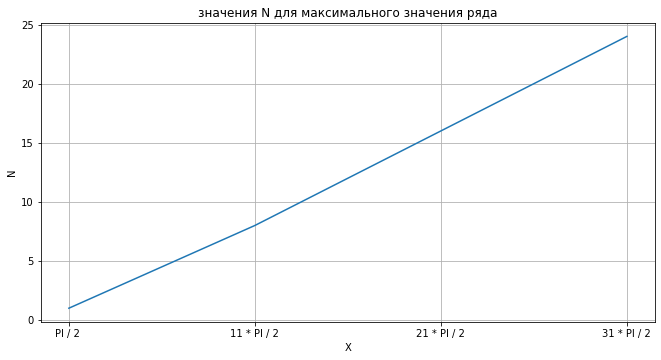

In [16]:
xAxis = ['PI / 2 ', '11 * PI / 2', '21 * PI / 2', '31 * PI / 2']
maxValue = [1, 8, 16, 24]
plt.figure(figsize=(11, 5.5))
plt.ylabel('N')
plt.xlabel('X')
plt.title('значения N для максимального значения ряда')
plt.plot(xAxis, maxValue)
plt.grid()

## 2) 
#### Даже на большом графике(ниже) не видна разница между максимальными значениями ряда при x = 21 * PI / 2 и x = 31 * PI / 2, в от время, как разница при x = 11 * PI / 2 и x = 21 * PI / 2 кажется ничтожной на этом фоне

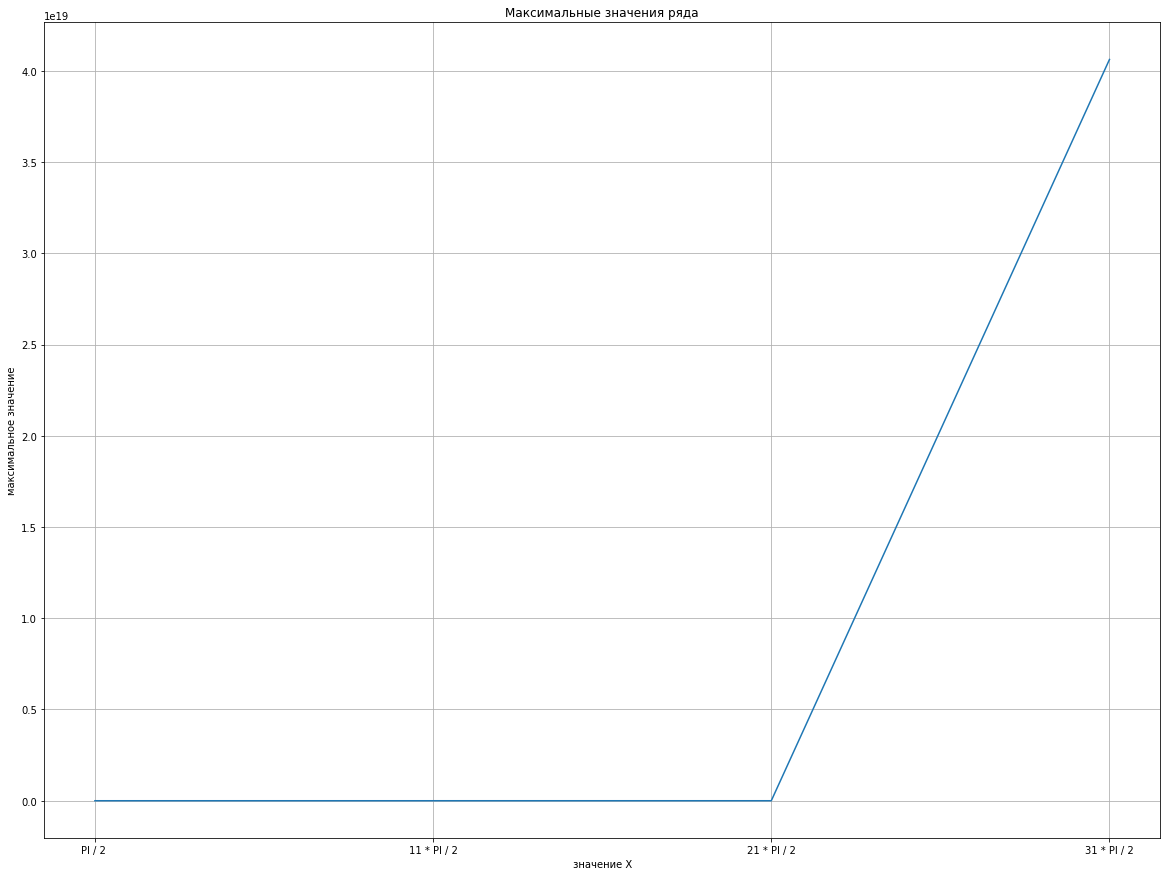

In [17]:
xAxis = ['PI / 2 ', '11 * PI / 2', '21 * PI / 2', '31 * PI / 2']
maxValue = [1.5707963267948966, 1556387.8895733021, 7455907444838.747, 40620503147940640000]
plt.figure(figsize=(20, 15))
plt.ylabel('максимальное значение')
plt.xlabel('значение X')
plt.title('Максимальные значения ряда')
plt.plot(xAxis, maxValue)
plt.grid()

## 3)
#### Количество n элементов, потребующихся для вычисления, будет больше, чтобы получить более приблеженное значение к точному:

    при x = PI / 2 потребовалось 5 элементов
    при x = 11 * PI / 2 потребовалось 26 элементов
    при x = 21 * PI / 2 потребовалось 50 элементов
    при x = 31 * PI / 2 потребовалось 85 элементов
    
    Значение для приблизительно точного значения изменяются не так равномерно с увеличением X, сравнивая с графиком зависимости значения N для максимального значения ряда от X
    (график ниже)

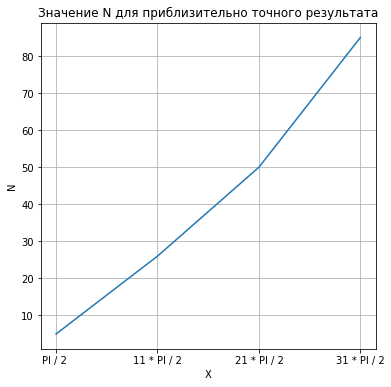

In [18]:
xAxis = ['PI / 2 ', '11 * PI / 2', '21 * PI / 2', '31 * PI / 2']
maxValue = [5, 26, 50, 85]
plt.figure(figsize=(6, 6))
plt.ylabel('N')
plt.xlabel('X')
plt.title('Значение N для приблизительно точного результата')
plt.plot(xAxis, maxValue)
plt.grid()

## 4)
#### Python не предостовляет возможности для болле точного вычисления, так как значени факториала от 86 и больше просто не помещается в размер переменной

Значение факториала 85: 281710411438055027694947944226061159480056634330574206405101912752560026159795933451040286452340924018275123200000000000000000000


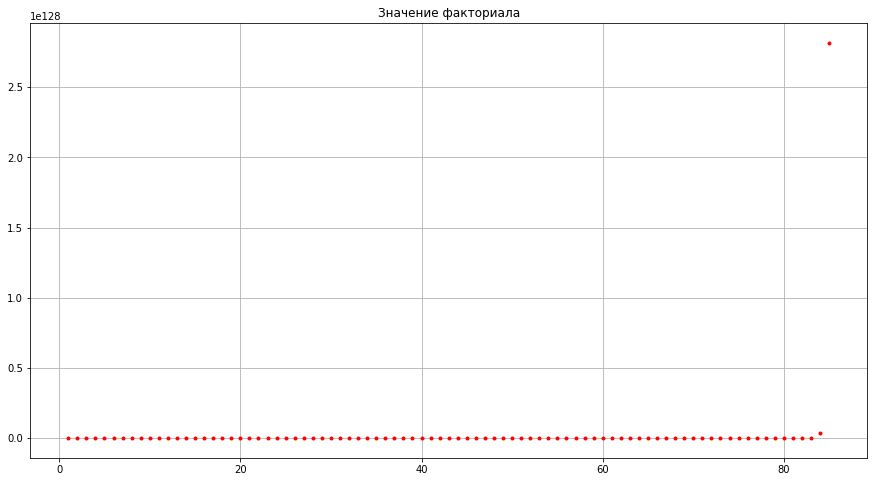

In [19]:
massF = []
massN = []
for i in range(1, 86):
    massF.append(factorial(i))
    massN.append(i)
    
plt.figure(figsize=(15, 8))
plt.title('Значение факториала')
plt.plot(massN, massF, 'r.')
plt.grid()
print('Значение факториала 85: ' + str(massF[-1]))